## Import Library

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
!pip install pyldavis==3.2.1
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136170 sha256=41e60cd579b5e1ddd6c1ee29280f715a18f9e825a13cefed756f8e7e5eb12bb6
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


## Coherence

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_coherence1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_coherence2.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_coherence3.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_coherence4.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_coherence5.csv')
data_coher = pd.concat([data1, data2,data3,data4,data5], ignore_index=True)
data_coher

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Alpha,Beta,Coherence
0,2,0.01,0.01,0.472212
1,2,0.01,0.11,0.439794
2,2,0.01,0.21000000000000002,0.440463
3,2,0.01,0.31000000000000005,0.440528
4,2,0.01,0.41000000000000003,0.450693
...,...,...,...,...
1843,15,asymmetric,0.6100000000000001,0.507496
1844,15,asymmetric,0.7100000000000001,0.518412
1845,15,asymmetric,0.81,0.512726
1846,15,asymmetric,0.91,0.497206


In [ ]:
df_sorted_desc = data_coher.sort_values('Coherence', ascending=False,ignore_index=True)

df_sorted_desc.loc[0:50]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Alpha,Beta,Coherence
0,11,symmetric,0.7100000000000001,0.554053
1,11,0.11,0.7100000000000001,0.553320
2,8,asymmetric,0.7100000000000001,0.551624
3,10,0.7100000000000001,0.31000000000000005,0.550797
4,8,asymmetric,0.81,0.550038
5,11,asymmetric,0.7100000000000001,0.549379
6,10,asymmetric,0.91,0.548454
7,8,0.6100000000000001,0.51,0.548078
8,10,asymmetric,0.81,0.547108
9,11,0.01,0.7100000000000001,0.546455


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


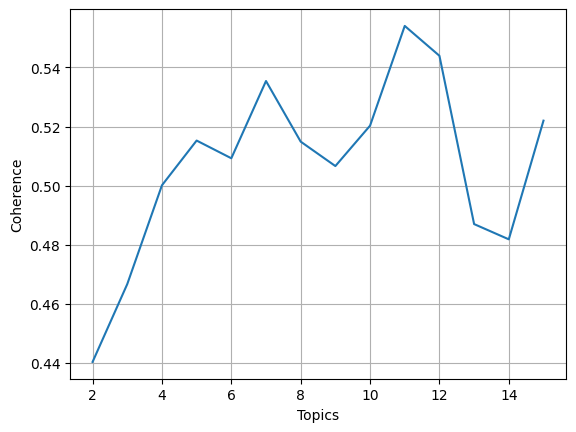

In [ ]:
evaluate = data_coher[(data_coher['Alpha']=='symmetric') & (data_coher['Beta']=='0.7100000000000001')]
sns.lineplot(data=evaluate,x="Topics", y="Coherence")
plt.grid()
# evaluate

In [ ]:
import ast
data_clean = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/data_bersih.csv')

# Mengubah string menjadi list
data_clean['isi_stemmed'] = data_clean['isi_stemmed'].apply(ast.literal_eval)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary =Dictionary(data_clean['isi_stemmed'])
corpus =[dictionary.doc2bow(text) for text in data_clean['isi_stemmed']]
lda_model = LdaModel(corpus=corpus,
                       id2word=dictionary,
                       num_topics=11,
                       chunksize=100,
                       passes=10,
                       alpha="symmetric",
                       iterations=100,
                       eta=0.71,
                       random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('\nTopic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.083*"nasdem" + 0.049*"pks" + 0.035*"partai demokrat" + 0.034*"demokrat" + 0.022*"ahy" + 0.017*"paloh" + 0.012*"surya paloh" + 0.011*"anies" + 0.011*"andi arief" + 0.010*"yusril"

Topic: 1 
Words: 0.019*"gibran" + 0.013*"wali kota" + 0.012*"solo" + 0.011*"acara" + 0.010*"temu" + 0.010*"hadir" + 0.009*"foto" + 0.008*"unggah" + 0.007*"warna" + 0.006*"sumut"

Topic: 2 
Words: 0.061*"prabowo" + 0.059*"gerindra" + 0.052*"pkb" + 0.027*"imin" + 0.023*"partai gerindra" + 0.022*"sandiaga" + 0.016*"jatim" + 0.015*"sandi" + 0.015*"prabowo subianto" + 0.013*"dasco"

Topic: 3 
Words: 0.024*"masyarakat" + 0.013*"kabupaten" + 0.013*"giat" + 0.012*"ganjar" + 0.011*"bantu" + 0.010*"rawan" + 0.009*"camat" + 0.009*"dukung" + 0.009*"harap" + 0.008*"perempuan"

Topic: 4 
Words: 0.035*"gugat" + 0.035*"kpu" + 0.017*"hukum" + 0.012*"trump" + 0.012*"pemilu" + 0.011*"bawaslu" + 0.010*"daftar" + 0.009*"serta milu" + 0.009*"mohon" + 0.008*"hasyim"

Topic: 5 
Words: 0.008*"benny" + 0.008*"jalan"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mendapatkan distribusi topik untuk setiap dokumen
result_df = pd.DataFrame(columns=['Dokumen', 'Topic_Distribution'])
for i, doc in enumerate(corpus):
    topic_distribution = lda_model.get_document_topics(doc)
    result_df.loc[i] = [i+1, topic_distribution]
result_df.to_excel('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/distribusi_topik.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result_df = pd.DataFrame(columns=['Dokumen', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

for i, doc in enumerate(corpus):
    topic_distribution = lda_model.get_document_topics(doc)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])
    topic_num = dominant_topic[0]
    perc_contribution = dominant_topic[1]
    topic_keywords = lda_model.show_topic(topic_num)
    keywords = ", ".join([word for word, prop in topic_keywords])
    result_df.loc[i] = [i+1, topic_num, perc_contribution, keywords]

# Menyimpan DataFrame ke file excel
result_df.to_excel('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/topik_dominant.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Perplexity

In [ ]:
data_1 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity1.csv')
data_2 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity2.csv')
data_3 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity3.csv')
data_4 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity4.csv')
data_5 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity5.csv')
data_6 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity6.csv')
data_7 = pd.read_csv('/content/drive/MyDrive/Bahan Penelitian/dataset penelitian/tunning_perplexity7.csv')
data_perplex = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6,data_7], ignore_index=True)
data_perplex

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Alpha,Beta,Perplexity
0,2,0.01,0.01,-28.286305
1,2,0.01,0.11,-8.314788
2,2,0.01,0.21000000000000002,-7.965940
3,2,0.01,0.31000000000000005,-7.926897
4,2,0.01,0.41000000000000003,-7.917412
...,...,...,...,...
2239,40,asymmetric,0.6100000000000001,-7.820431
2240,40,asymmetric,0.7100000000000001,-7.842433
2241,40,asymmetric,0.81,-7.858835
2242,40,asymmetric,0.91,-7.896695


In [ ]:
df_sorted_desc = data_perplex.sort_values('Perplexity', ascending=True,ignore_index=True)

df_sorted_desc.loc[:50]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Alpha,Beta,Perplexity
0,40,0.91,0.01,-28.806727
1,40,0.81,0.01,-28.636847
2,30,0.91,0.01,-28.504138
3,40,0.7100000000000001,0.01,-28.441420
4,30,0.81,0.01,-28.334710
5,4,0.01,0.01,-28.334422
6,3,0.01,0.01,-28.334236
7,2,0.6100000000000001,0.01,-28.333143
8,2,symmetric,0.01,-28.326074
9,2,0.51,0.01,-28.325994


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


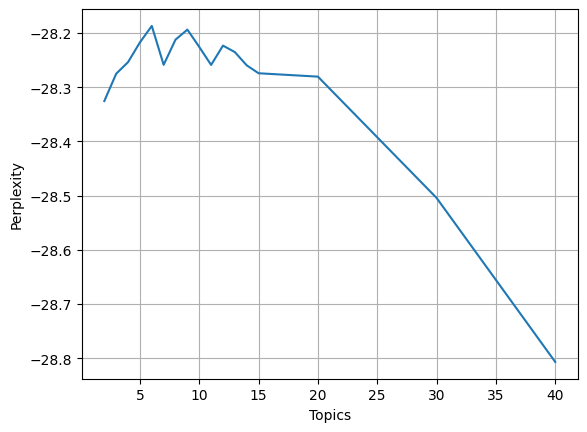

In [ ]:
evaluate = data_perplex[(data_perplex['Alpha']=='0.91') & (data_perplex['Beta']=='0.01')]
sns.lineplot(data=evaluate,x="Topics", y="Perplexity")
plt.grid()
# evaluate